In [ ]:
# ---------------------------------------------------------------------------
# Langkah 0: Instalasi Pustaka yang Diperlukan
# ---------------------------------------------------------------------------
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

required_packages = [
    'pandas',
    'numpy', 
    'scikit-learn',
    'matplotlib',
    'seaborn'
]

for package in required_packages:
    try:
        __import__(package.replace('-', '_'))
    except ImportError:
        install(package)


Menginstal pustaka yang diperlukan...
⏳ Menginstal pandas...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.7 MB ? eta -:--:--Requirement already satisfied: six>=1.5 in /Users/ridwanfirmansyah/Documents/GitHub/model-kpbu/.venv/lib/python3.13/site-packages (from python-dateutil>=2.8.2->pandas) (1.17.0)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/4 [tzdata]Installing collected packages: pytz, tzdata, numpy, pandas
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
✓ pandas berhasil diinstal
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
✓ pandas berhasil diinstal
✓ numpy sudah terinstal
⏳ Menginstal s

In [3]:
# ---------------------------------------------------------------------------
# Langkah 1: Impor Pustaka yang Diperlukan
# ---------------------------------------------------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import random

Matplotlib is building the font cache; this may take a moment.


In [6]:
# ---------------------------------------------------------------------------
# Langkah 2: Memuat Dataset dari File CSV Lokal
# ---------------------------------------------------------------------------

# Path ke file CSV lokal
file_path = '../model/data/dummydata_kpbu.csv'

# Muat data dari file CSV
try:
    df = pd.read_csv(file_path)
    print(f"File '{file_path}' berhasil dimuat.")
except FileNotFoundError:
    print(f"File tidak ditemukan: {file_path}")
    print("Pastikan file dummydata_kpbu.csv ada di folder data/")
    raise SystemExit()
except Exception as e:
    print(f"Terjadi kesalahan saat memuat file: {e}")
    raise SystemExit()

print("\n--- Data Awal Proyek (dari CSV) ---")
print(df.head())
print("\nDistribusi Profil Risiko dalam Dataset:")
print(df['Profil_Risiko'].value_counts())
print("\nInfo Tipe Data:")
df.info()

File '../model/data/dummydata_kpbu.csv' berhasil dimuat.

--- Data Awal Proyek (dari CSV) ---
  ID_Proyek                           Nama_Proyek     Sektor_Proyek  \
0   PROJ001  Tol Trans-Sumatera Ruas Betung-Jambi  Jalan & Jembatan   
1   PROJ002    Kampus Digital Universitas Terbuka        Pendidikan   
2   PROJ003                 Jembatan Batam-Bintan  Jalan & Jembatan   
3   PROJ004        Revitalisasi Pelabuhan Belawan      Transportasi   
4   PROJ005                  RSUD Tipe C Wonosobo         Kesehatan   

         Status_Proyek  Durasi_Konsesi_Tahun  Nilai_Investasi_Total_IDR  \
0              Operasi                    38               105000000000   
1           Konstruksi                    28                43000000000   
2  Pra-Studi Kelayakan                    28                26000000000   
3           Konstruksi                    35               164000000000   
4              Operasi                    23                 5000000000   

   Target_Dana_Tokenisasi_ID

In [7]:
# ---------------------------------------------------------------------------
# Langkah 3: Pra-pemrosesan Data (Data Preprocessing)
# ---------------------------------------------------------------------------
# Memisahkan fitur (X) dan target (y)
X = df.drop(['ID_Proyek', 'Nama_Proyek', 'Profil_Risiko'], axis=1)
y = df['Profil_Risiko']

# Mengubah kolom kategorikal menjadi numerik menggunakan One-Hot Encoding
X = pd.get_dummies(X, columns=['Sektor_Proyek', 'Status_Proyek', 'Jenis_Token_Utama'], drop_first=True)

# Mengubah label target menjadi numerik
le = LabelEncoder()
y_encoded = le.fit_transform(y)
risk_mapping = {index: label for index, label in enumerate(le.classes_)}
print(f"\n--- Pemetaan Label Risiko ---\n{risk_mapping}\n")

print("--- Data Setelah Pra-pemrosesan (Siap untuk Model) ---")
print(X.head())



--- Pemetaan Label Risiko ---
{0: 'Menengah', 1: 'Rendah', 2: 'Sangat Tinggi', 3: 'Tinggi'}

--- Data Setelah Pra-pemrosesan (Siap untuk Model) ---
   Durasi_Konsesi_Tahun  Nilai_Investasi_Total_IDR  \
0                    38               105000000000   
1                    28                43000000000   
2                    28                26000000000   
3                    35               164000000000   
4                    23                 5000000000   

   Target_Dana_Tokenisasi_IDR  Persentase_Tokenisasi  \
0                 12600000000                   0.12   
1                  2494000000                   0.58   
2                  1820000000                   0.70   
3                 34440000000                   0.21   
4                  1650000000                   0.33   

   Token_Risk_Level_Ordinal  Token_Ada_Jaminan_Pokok  \
0                         1                        1   
1                         4                        0   
2                    

In [8]:
# ---------------------------------------------------------------------------
# Langkah 4: Membagi Data dan Melatih Model
# ---------------------------------------------------------------------------
# Membagi data menjadi 80% untuk latihan (training) dan 20% untuk pengujian (testing)
# 'random_state' digunakan agar hasil pembagian data selalu sama setiap kali kode dijalankan
# Menghapus 'stratify' karena ukuran data terlalu kecil dan ada kelas dengan hanya 1 sampel
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Memilih dan menginisialisasi model
# RandomForestClassifier adalah pilihan yang baik karena kuat dan bisa menangani
# berbagai jenis fitur serta memberikan informasi 'feature importance'.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model menggunakan data training
model.fit(X_train, y_train)
print("\n--- Model Berhasil Dilatih! ---")


--- Model Berhasil Dilatih! ---



--- Hasil Evaluasi Model ---
Akurasi Model: 1.00

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Menengah       1.00      1.00      1.00         8
       Rendah       1.00      1.00      1.00         5
Sangat Tinggi       1.00      1.00      1.00         3
       Tinggi       1.00      1.00      1.00         4

     accuracy                           1.00        20
    macro avg       1.00      1.00      1.00        20
 weighted avg       1.00      1.00      1.00        20



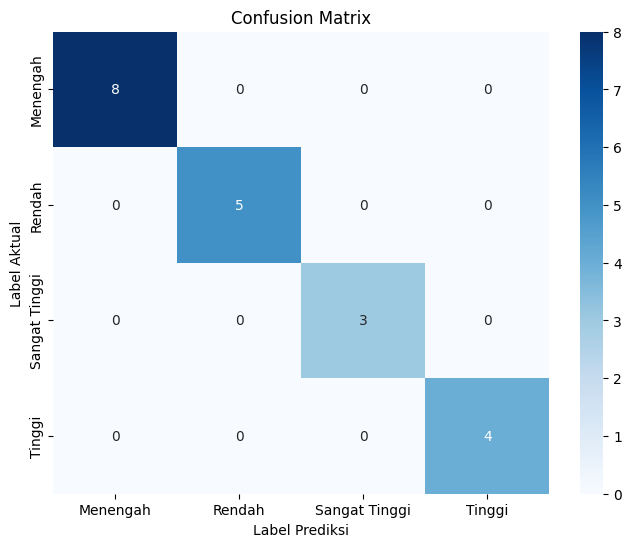

In [9]:
# ---------------------------------------------------------------------------
# Langkah 5: Evaluasi Kinerja Model
# ---------------------------------------------------------------------------
# Membuat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menampilkan hasil evaluasi
print("\n--- Hasil Evaluasi Model ---")
print(f"Akurasi Model: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:")
# Menggunakan 'target_names' untuk menampilkan label asli
# Menambahkan parameter 'labels' untuk mengatasi ketidakcocokan jumlah kelas
print(classification_report(y_test, y_pred, target_names=le.classes_, labels=le.transform(le.classes_), zero_division=0))

# Menampilkan Confusion Matrix untuk melihat kesalahan prediksi secara detail
cm = confusion_matrix(y_test, y_pred, labels=le.transform(le.classes_)) # Menambahkan parameter 'labels' di sini juga
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.show()

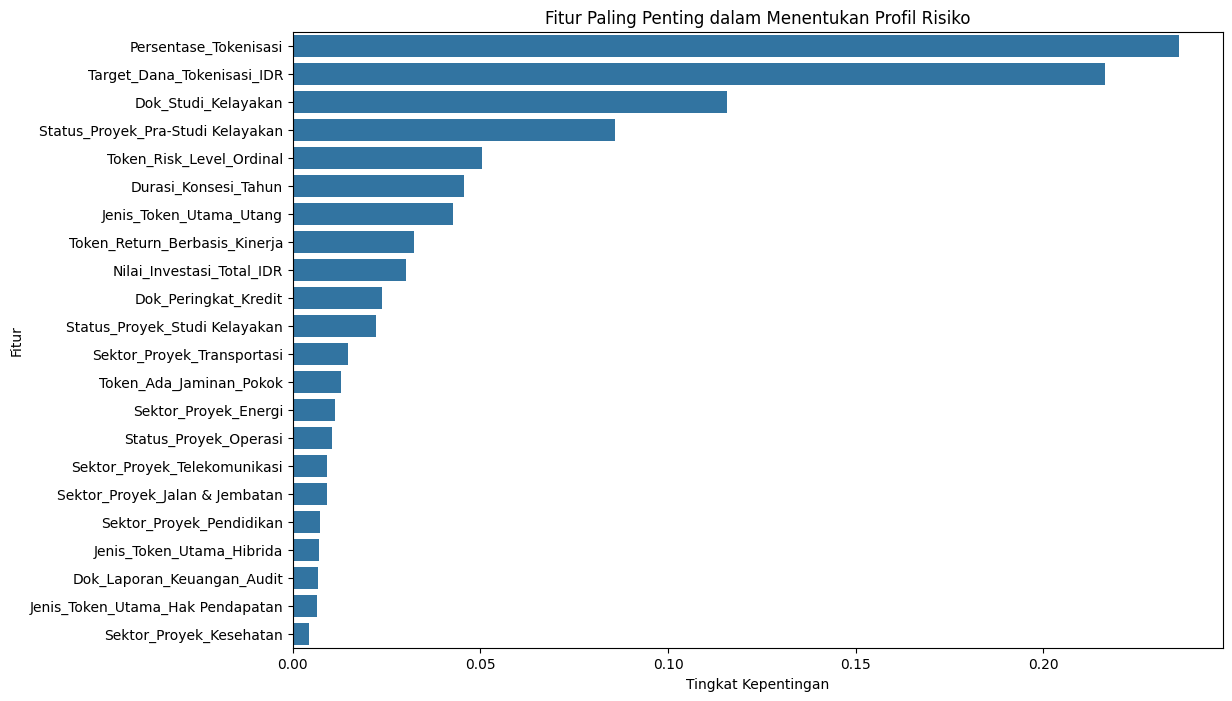


--- Fitur Paling Penting ---
Persentase_Tokenisasi                0.236069
Target_Dana_Tokenisasi_IDR           0.216486
Dok_Studi_Kelayakan                  0.115568
Status_Proyek_Pra-Studi Kelayakan    0.085831
Token_Risk_Level_Ordinal             0.050505
Durasi_Konsesi_Tahun                 0.045631
Jenis_Token_Utama_Utang              0.042648
Token_Return_Berbasis_Kinerja        0.032254
Nilai_Investasi_Total_IDR            0.030097
Dok_Peringkat_Kredit                 0.023690
Status_Proyek_Studi Kelayakan        0.022265
Sektor_Proyek_Transportasi           0.014729
Token_Ada_Jaminan_Pokok              0.012942
Sektor_Proyek_Energi                 0.011349
Status_Proyek_Operasi                0.010380
Sektor_Proyek_Telekomunikasi         0.009135
Sektor_Proyek_Jalan & Jembatan       0.009049
Sektor_Proyek_Pendidikan             0.007258
Jenis_Token_Utama_Hibrida            0.006838
Dok_Laporan_Keuangan_Audit           0.006651
Jenis_Token_Utama_Hak Pendapatan     0.006327
Sekt

In [10]:
# ---------------------------------------------------------------------------
# Langkah 6: Menganalisis Fitur Paling Penting (Feature Importance)
# ---------------------------------------------------------------------------
# Menganalisis fitur mana yang paling berpengaruh dalam menentukan risiko
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Fitur Paling Penting dalam Menentukan Profil Risiko')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.show()

print("\n--- Fitur Paling Penting ---")
print(feature_importances)



In [11]:
# ---------------------------------------------------------------------------
# Langkah 7: Menggunakan Model untuk Memprediksi BATCH Proyek Baru dari File
# ---------------------------------------------------------------------------
print("\n\n--- TAHAP 2: PREDIKSI BATCH ---")

# Path ke file prediksi (bisa disesuaikan dengan kebutuhan)
pred_file_path = '..model//data/data_prediksi.csv'

try:
    # Cek apakah file prediksi ada
    if os.path.exists(pred_file_path):
        df_prediksi = pd.read_csv(pred_file_path)
        print(f"File Prediksi '{pred_file_path}' berhasil dimuat.")
    else:
        print(f"File prediksi tidak ditemukan: {pred_file_path}")
        print("Menggunakan subset data training untuk demo prediksi...")
        # Gunakan beberapa baris pertama dari data asli tanpa kolom Profil_Risiko sebagai contoh
        df_prediksi = df.drop('Profil_Risiko', axis=1).head(3)

    # Simpan ID dan Nama Proyek untuk hasil akhir
    pred_ids = df_prediksi['ID_Proyek']
    pred_names = df_prediksi['Nama_Proyek']

    # Lakukan pra-pemrosesan yang SAMA PERSIS dengan data latihan
    X_pred = df_prediksi.drop(['ID_Proyek', 'Nama_Proyek'], axis=1)
    X_pred = pd.get_dummies(X_pred, columns=['Sektor_Proyek', 'Status_Proyek', 'Jenis_Token_Utama'], drop_first=True)

    # Reindex kolom agar cocok persis dengan data training, isi kolom yang hilang dengan 0
    X_pred = X_pred.reindex(columns=X.columns, fill_value=0)

    # Lakukan prediksi
    prediksi_encoded = model.predict(X_pred)
    prediksi_proba = model.predict_proba(X_pred)
    prediksi_labels = le.inverse_transform(prediksi_encoded)

    # Buat DataFrame untuk menampilkan hasil dengan rapi
    hasil_df = pd.DataFrame({
        'ID_Proyek': pred_ids,
        'Nama_Proyek': pred_names,
        'Prediksi_Profil_Risiko': prediksi_labels
    })

    # Tambahkan probabilitas untuk setiap kelas
    for i, class_name in enumerate(le.classes_):
        hasil_df[f'Prob_{class_name}'] = [f"{p:.2%}" for p in prediksi_proba[:, i]]

    print("\n--- HASIL PREDIKSI PROFIL RISIKO UNTUK PROYEK BARU ---")
    print(hasil_df.to_string())

except Exception as e:
    print(f"\nTerjadi kesalahan saat memproses file prediksi: {e}")



--- TAHAP 2: PREDIKSI BATCH ---
File prediksi tidak ditemukan: ..model//data/data_prediksi.csv
Menggunakan subset data training untuk demo prediksi...

--- HASIL PREDIKSI PROFIL RISIKO UNTUK PROYEK BARU ---
  ID_Proyek                           Nama_Proyek Prediksi_Profil_Risiko Prob_Menengah Prob_Rendah Prob_Sangat Tinggi Prob_Tinggi
0   PROJ001  Tol Trans-Sumatera Ruas Betung-Jambi                 Rendah        21.00%      64.00%              9.00%       6.00%
1   PROJ002    Kampus Digital Universitas Terbuka                 Tinggi         4.00%       1.00%              4.00%      91.00%
2   PROJ003                 Jembatan Batam-Bintan          Sangat Tinggi         2.00%       0.00%             79.00%      19.00%
